# Tutorial on Supervised Learning

## Part 2 : Classification using k-Nearest Neighbor (k-NN)  (implemented in Python from scratch)

## Quick Recap

### k-NN - A lazy learner !
It doesn’t learn a discriminative function from the training data, but “memorizes” the training dataset instead.

Example - With given data below, classify a new point (denoted by the blue star), which can belong in either red or green class. 
<center><img src="scenario1.webp"></center>


Assume k = 3. Then based on the class votes received from the 3-nearest neighbors, Blue Star will be classified into the majority class.
<center><img src="scenario2.webp"></center>


## Pre-requisite 

- **Euclidean distance** between two points 
- How **voting** works
- Dataset knowledge : **Titanic dataset (used previously in the tutorial on Naive Bayes)** 

- With given dataset: Memorize a person's *Age* and *Fare*; supervision (label): he/she *survived* or not.
- Classifying a new datapoint: Using *Age* and *Fare* our learner will predict whether the person survives or not.

In [1]:
# necessary dependencies

import numpy as np
import pandas as pd
from collections import Counter

In [2]:
# load training data

data=pd.read_csv("./train.csv")[["Survived","Age","Fare"]]
data=data.fillna(data.mean())
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# load test data

passenger_id=pd.read_csv("./test.csv")["PassengerId"]
test_data=pd.read_csv("./test.csv")[["Age","Fare"]]
test_data=test_data.fillna(test_data.mean())
print(test_data.head())
test_data=test_data.values

    Age     Fare
0  34.5   7.8292
1  47.0   7.0000
2  62.0   9.6875
3  27.0   8.6625
4  22.0  12.2875


We need to visualize the training data to understand how k-NN works.

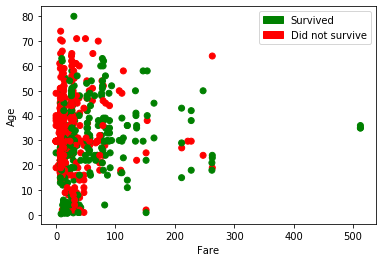

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

col=data["Survived"]
colormap = np.array(['r', 'g'])
plt.scatter( x=data["Fare"],y=data["Age"], c=colormap[col])
surv = mpatches.Patch(color='g', label='Survived')
notSurv = mpatches.Patch(color='r', label='Did not survive')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend(handles=[surv,notSurv])
plt.show()

In [6]:
def compute_distances_one_loop(new_points, X_train):
    #X_Train = all of our given training samples, 
    # new_points = our new points on which we want to predict
    
    num_test = len(new_points)
    num_train =X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        
        # for each test point, computing Euclidean distance from all points in X_train
        difference = new_points[i] - X_train
        difference = np.square(difference)
        sum1 = np.sum(difference, axis=1)
        dists[i] = np.sqrt(sum1)
    return dists

In [7]:
# Now that we have distance from each point, we will simply find out the distance which is the least
def predict(dists, training_labels, k=3):
    closest_y = []
    rank = list(np.argsort(dists))
    for x in range(0, k):
        closest_y.append(training_labels[rank[x]])
    closest_y = np.asarray(closest_y)
    c=Counter(closest_y)
    return (c.most_common()[0][0])

In [8]:
dists=compute_distances_one_loop(test_data,data[["Fare","Age"]])
print('Training instances: {}'.format(data.shape[0]))
print('Testing instances: {}'.format(test_data.shape[0]))

Results=[]
for x in dists:
    Results.append(predict(x, data["Survived"]))
    


Training instances: 891
Testing instances: 418


In [9]:
# storing the results
f=open("result.csv","w")
f.write("PassengerId,Survived")
for i in range(0, len(Results)):
    f.write("\n")
    f.write(str(passenger_id[i])+","+ str(Results[i]))
    
f.close()

Let's compare the performance of our implementation with the kNN classifier of **scikit-learn**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data[["Fare","Age"]], data["Survived"])
scikit_result=neigh.predict(test_data)


count=0
notr=[]
for i in range(0, len(scikit_result)):
    if scikit_result[i]==Results[i]:
        count+=1
    else:
        notr.append(i)
        
print ("TOTAL INSTANCES: {}".format(len(scikit_result)))
print ("RESULTS MATCHED B/W IMPLEMENTED KNN AND SCIKIT-LEARN INBUILT KNN: {}/{}".format(count, len(scikit_result)))

TOTAL INSTANCES: 418
RESULTS MATCHED B/W IMPLEMENTED KNN AND SCIKIT-LEARN INBUILT KNN: 416/418


# End of Part 2